In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [25]:
df =  pd.read_csv("D:\\Luminar\\Customers.csv")
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [18]:
df.drop(['CustomerID','Gender'],inplace=True,axis=1)

In [19]:
df.isna().sum()

Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [20]:
df.dropna(inplace=True)

In [21]:
df

,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,19,15000,39,Healthcare,1,4
1,21,35000,81,Engineer,3,3
2,20,86000,6,Engineer,1,1
3,23,59000,77,Lawyer,0,2
4,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...
1995,71,184387,40,Artist,8,7
1996,91,73158,32,Doctor,7,7
1997,87,90961,14,Healthcare,9,2
1998,77,182109,4,Executive,7,2


In [22]:
for i in df.columns:
    if df[i].dtype == "object":
        le=LabelEncoder()
        df[i]=le.fit_transform(df[i])
df
    

,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,19,15000,39,5,1,4
1,21,35000,81,2,3,3
2,20,86000,6,2,1,1
3,23,59000,77,7,0,2
4,31,38000,40,3,2,6
...,...,...,...,...,...,...
1995,71,184387,40,0,8,7
1996,91,73158,32,1,7,7
1997,87,90961,14,5,9,2
1998,77,182109,4,4,7,2


In [23]:
from sklearn.cluster import KMeans
nvec = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init="k-means++",random_state=42)
    km.fit(df)
    nvec.append(km.inertia_)
    

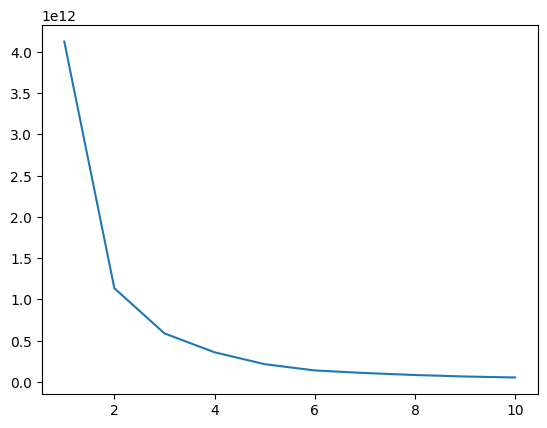

In [24]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),nvec)